# [IAPR 2020:][iapr2020] Lab 3 ‒  Classification

**Author:** Theodor Tveit Husefest, Arlid Madshaven, Mathies Pollas Bjerg
**Due date:** 08.05.2020

[iapr2018]: https://github.com/LTS5/iapr-2018

## Extract relevant data
We first need to extract the `lab-03-data.tar.gz` archive.
To this end, we use the [tarfile] module from the Python standard library.

[tarfile]: https://docs.python.org/3.6/library/tarfile.html

In [1]:
import tarfile
import os
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

data_base_path = os.path.join(os.pardir, '../data')
data_folder = 'lab-03-data'
tar_path = os.path.join(data_base_path, data_folder + '.tar.gz')
with tarfile.open(tar_path, mode='r:gz') as tar:
    tar.extractall(path=data_base_path)

## Part 1
In this part, we will study classification based on the data available in the Matlab file `classification.mat` that you will under `lab-03-data/part1`.
There are 3 data sets in this file, each one being a training set for a given class.
They are contained in variables `a`, `b` and `c`.

**Note**: we can load Matlab files using the [scipy.io] module.

[scipy.io]: https://docs.scipy.org/doc/scipy/reference/io.html

In [2]:
import scipy.io

data_part1_path = os.path.join(data_base_path, data_folder, 'part1', 'classification.mat')
matfile = scipy.io.loadmat(data_part1_path)
a = matfile['a']
b = matfile['b']
c = matfile['c']

print(a.shape, b.shape, c.shape)

(200, 2) (200, 2) (200, 2)


### 1.1 Bayes method
Using the Bayes method, give the analytical expression of the separation curves between those three classes.
Do reasonable hypotheses about the distributions of those classes and estimate the corresponding parameters based on the given training sets.
Draw those curves on a plot, together with the training data.
For simplicity reasons, round the estimated parameters to the closest integer value.

*Add your implementation and discussion*

In [3]:
data = np.concatenate((a, b, c))
data.shape

(600, 2)

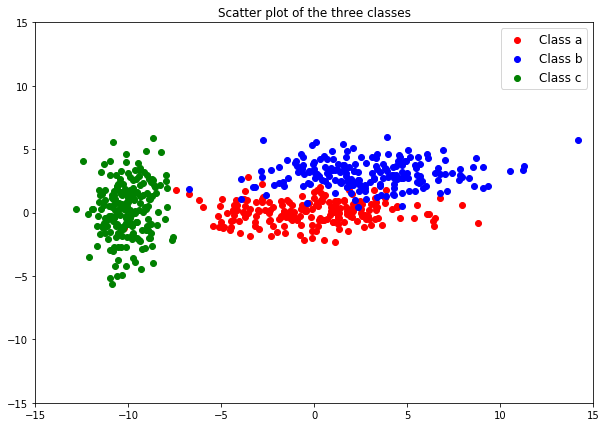

In [4]:
f = plt.figure(figsize = (10, 7))
plt.scatter(a[:,0], a[:,1], color = 'r')
plt.scatter(b[:,0], b[:,1], color = 'b')
plt.scatter(c[:,0], c[:,1], color = 'g')

plt.legend(['Class a', 'Class b', 'Class c'], fontsize = 12)
plt.title('Scatter plot of the three classes')
plt.xlim([-15, 15])
plt.ylim([-15,15])
plt.show()

---
- We observe that the classes looks somewhat Gaussian, and with different means. At first glance it looks like class a and b have similar covariances, and that class c looks a bit differently distributed.
---

In [5]:
def caluclate_mu_and_sig(x):
    """
    Returns mean-vector and covariance-matrix rounded to nearest integer
    """
    return np.around(x.mean(axis = 0), 0).astype(int), np.around(np.cov(x, rowvar = False), 0).astype(int)

a_mu, a_sig = caluclate_mu_and_sig(a)
b_mu, b_sig = caluclate_mu_and_sig(b)
c_mu, c_sig = caluclate_mu_and_sig(c)
print('Covariance of class a: \n{}\nCovariance of class b: \n{}\nCovariance of class c: \n{}'.format(a_sig, b_sig, c_sig))

Covariance of class a: 
[[10  0]
 [ 0  1]]
Covariance of class b: 
[[10  0]
 [ 0  1]]
Covariance of class c: 
[[1 0]
 [0 5]]


---
- We see that in fact that class a and b have equal covariance-matrices (when rounded to integers), and that c is different. The off-diagonal elements are zero, which tells us that the samples are independently distributed.   
 
We know that we can write the decision curves as $ g_i - g_j = 0$, and in this case:
$$ g_i = -\frac{1}{2}(x-\mu_i)^T \Sigma_i (x-\mu_i) + \ln(P(w_i)) + c_i$$  
$$ g_i = -(\frac{1}{2\sigma^2_{i1}}x^2 + \frac{1}{2\sigma^2_{i2}}y^2 ) + (\frac{1}{\sigma^2_{i1}} x \mu_{i1} + \frac{1}{ \sigma^2_{i2}}y \mu_{i2}) -\frac{1}{2} (\frac{1}{\sigma^2_{i1}} \mu^2_{i1} + \frac{1}{ \sigma^2_{i2}} \mu^2_{i2}) + \ln(P(w_i)) + c_i$$   
$$ g_i = a_{i1}x^2 + a_{i2}y^2 + b_{i1}x + b_{i2}y + c_i$$   
$$ a_{i1} = -\frac{1}{2\sigma^2_{i1}}, a_{i2} = -\frac{1}{2\sigma^2_{i2}}, b_{i1} = \frac{\mu_{i1}}{\sigma^2_{i1}}, b_{i2} = \frac{\mu_{i2}}{\sigma^2_{i2}}$$  
$$ c_i = -\frac{1}{2} (\frac{1}{\sigma^2_{i1}} \mu^2_{i1} + \frac{1}{ \sigma^2_{i2}} \mu^2_{i2}) + \ln(P(w_i)) - \ln(2\pi) + \frac{1}{2}\ln(\det{\Sigma_i}) $$
---

In [6]:
def calculate_coefficients(mu, sigma):
    """
    Calculates coeficients for Bayesian classifier
    """
    a1 = -1/(2*sigma[0,0])
    a2 = -1/(2*sigma[1,1])
    b1 = mu[0]/sigma[0,0]
    b2 = mu[1]/sigma[1,1]
    c = -0.5*(mu[0]**2/sigma[0,0] + mu[1]**2/(sigma[1,1])) - np.log(3) - np.log(2*np.pi) + 0.5*np.log(np.linalg.det(sigma))
    return a1, a2, b1, b2, c

ab_coef = np.asarray(calculate_coefficients(a_mu, a_sig))-np.asarray(calculate_coefficients(b_mu, b_sig))
ac_coef = np.asarray(calculate_coefficients(a_mu, a_sig))-np.asarray(calculate_coefficients(c_mu, c_sig))
bc_coef = np.asarray(calculate_coefficients(b_mu, b_sig))-np.asarray(calculate_coefficients(c_mu, c_sig))



In [7]:
# Calculate curves
abx = np.arange(-7, 15, 0.1)
aby = np.arange(-7, 7, 0.1)
abX, abY = np.meshgrid(abx, aby)
ab = ab_coef[0]*abX**2 + ab_coef[1]*abY**2 + ab_coef[2]*abX + ab_coef[3]*abY + ab_coef[4]

acx = np.arange(-14, 15, 0.1)
acy = np.arange(-15, 2.4, 0.1)
acX, acY = np.meshgrid(acx, acy)
ac = ac_coef[0]*acX**2 + ac_coef[1]*acY**2 + ac_coef[2]*acX + ac_coef[3]*acY + ac_coef[4]

bcx = np.arange(-14, 15, 0.1)
bcy = np.arange(2.3, 14, 0.1)
bcX, bcY = np.meshgrid(bcx, bcy)
bc = bc_coef[0]*bcX**2 + bc_coef[1]*bcY**2 + bc_coef[2]*bcX + bc_coef[3]*bcY + bc_coef[4]


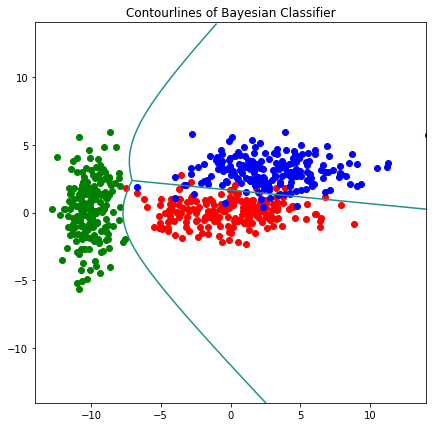

In [8]:
# Plot curves with the data
f = plt.figure(figsize = (7, 7))

plt.contour(abX, abY, ab, 0)
plt.contour(acX, acY, ac, 0)
plt.contour(bcX, bcY, bc, 0)

plt.scatter(a[:,0], a[:,1], color = 'r')
plt.scatter(b[:,0], b[:,1], color = 'b')
plt.scatter(c[:,0], c[:,1], color = 'g')

plt.title('Contourlines of Bayesian Classifier')
plt.xlim([-14, 14])
plt.ylim([-14, 14])

plt.show()

---
#### Discussion of Task 1.1

We see that we get pretty good contourlines/separation between the classes when using the Bayesian Classifier.  
Between class a and b we get a straight line, which is to expect as they have the same covariance. 
Since class C has different covariance we get the curved boundaries to the other classes.  
Although there are some misclassifications, these are unavoidable which this kind of classification as the data is overlapping.  
Actually, if the data is in fact Gaussian these are optimal boundaries (up to rounding-errors).

---

### 1.2 Mahalanobis distance
For classes `a` and `b`, give the expression of the Mahalanobis distance used to classify a point in class `a` or `b`, and verify the obtained classification, in comparison with the "complete" Bayes classification, for a few points of the plane.

*Add your implementation and discussion*

---
So the Mahalanobis distance is basically the Eucledian distance, but taking into concideration differences in covariances. We label the new point by minimizing the Mahalanobis distance which is calculated from the following equation.
$$ d_m = \sqrt{(x - \mu_i)\Sigma^{-1}(x - \mu_i)}$$
---

In [9]:
def calculate_mahalanobis_distance(class_, X):
    """
    Returns the Mahalanobis distance to a given class
    """
    mu, sig = caluclate_mu_and_sig(class_)
    return np.sqrt( (X-mu) @ np.linalg.inv(sig) @ (X-mu))
    

def label_point(data, X):
    """
    Returns a point label based on Mahalanobis distance
    """
    distances = []
    for class_ in data:
        distances.append(calculate_mahalanobis_distance(class_, X))
    return np.argmin(distances)


In [10]:
import random
def generate_gaussian_points(class_, num_points):
    """
    Generates random points from a gaussian distribution 
    """
    mu, sig = caluclate_mu_and_sig(class_)
    x = [random.gauss(mu[0], np.sqrt(sig[0,0])) for _ in range(num_points)]
    y = [random.gauss(mu[1], np.sqrt(sig[1,1])) for _ in range(num_points)]
        
    return x,y

Number of misclassified points is 14, resulting in accuracy of 95.33333333333334%.


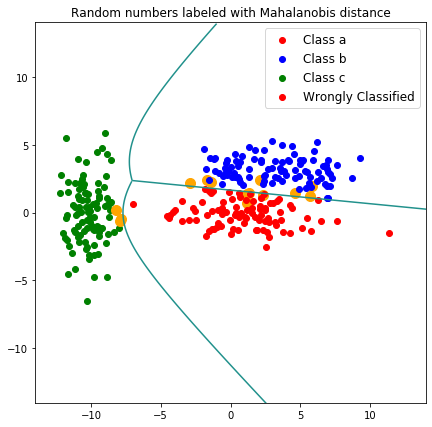

In [22]:
random.seed(12)

def plot_classified_point(x, y, label, correct_label):
    """
    Helper function for plotting the points and report missclassified
    Returns 1 if missclassified
    """
    colors = {0: 'red', 1: 'blue', 2: 'green', 3: 'orange'}
    
    if label != correct_label:
        plt.scatter(x, y, s = 100,color = colors[3])
        return 1
    else:
        plt.scatter(x, y, color = colors[label])
        return 0


classes = [a, b, c]
f = plt.figure(figsize = (7,7))
num_points = 100

xa, ya = generate_gaussian_points(classes[0], num_points)
xb, yb = generate_gaussian_points(classes[1], num_points)
xc, yc = generate_gaussian_points(classes[2], num_points)

misclassified = 0
for i in range(num_points):
    label_a = label_point(classes, [xa[i], ya[i]])
    label_b = label_point(classes, [xb[i], yb[i]])
    label_c = label_point(classes, [xc[i], yc[i]])
    misclassified += plot_classified_point(xa[i], ya[i], label_a, 0)
    misclassified += plot_classified_point(xb[i], yb[i], label_b, 1)
    misclassified += plot_classified_point(xc[i], yc[i], label_c, 2)

print('Number of misclassified points is {}, resulting in accuracy of {}%.'.format(misclassified, 100*(1-(misclassified/(num_points*3)))))
    

# Add contours from the Bayesian classifier
plt.contour(abX, abY, ab, 0)
plt.contour(acX, acY, ac, 0)
plt.contour(bcX, bcY, bc, 0)

plt.xlim([-14, 14])
plt.ylim([-14, 14])
plt.title('Random numbers labeled with Mahalanobis distance')
plt.legend(['Class a', 'Class b', 'Class c', 'Wrongly Classified'], fontsize = 12 )

plt.show()

---
#### Thoughs on Task 1.2

To generate the points we used random gaussian number from the same distributions as Task 1.1, and in the plot above we have labeled the misclassified points.
We see that the Mahalanobis is doing a good job labeling the points, getting an accuracy of around 95%. As the classes are overlapping it is impossible to get 100%, as the Bayesian classifier is optimal when knowing the distributions as we do here.

---

## Part 2
In this part, we aim to classify digits using the complete version of MNIST digits dataset.
The dataset consists of 60'000 training images and 10'000 test images of handwritten digits.
Each image has size 28x28, and has assigned a label from zero to nine, denoting the digits value.
Given this data, your task is to construct a Multilayer Perceptron (MLP) for supervised training and classification and evaluate it on the test images.

Download the MNIST dataset (all 4 files) from http://yann.lecun.com/exdb/mnist/ under `lab-03-data/part2`.
You can then use the script provided below to extract and load training and testing images in Python.

To create an MLP you are free to choose any library.
In case you don't have any preferences, we encourage you to use the [scikit-learn] package; it is a simple, efficient and free tool for data analysis and machine learning.
In this [link][sklearn-example], you can find a basic example to see how to create and train an MLP using [scikit-learn].
Your network should have the following properties:
* Input `x`: 784-dimensional (i.e. 784 visible units representing the flattened 28x28 pixel images).
* 100 hidden units `h`.
* 10 output units `y`, i.e. the labels, with a value close to one in the i-th class representing a high probability of the input representing the digit `i`.

If you need additional examples you can borrow some code from image classification tutorials.
However, we recommend that you construct a minimal version of the network on your own to gain better insights.

[scikit-learn]: http://scikit-learn.org/stable/index.html
[sklearn-example]: http://scikit-learn.org/stable/modules/neural_networks_supervised.html

### 2.1 Dataset loading
Here we first declare the methods `extract_data` and `extract_labels` so that we can reuse them later in the code.
Then we extract both the data and corresponding labels, and plot randomly some images and corresponding labels of the training set.

In [12]:
import gzip
import numpy as np
import matplotlib.pyplot as plt

def extract_data(filename, image_shape, image_number):
    with gzip.open(filename) as bytestream:
        bytestream.read(16)
        buf = bytestream.read(np.prod(image_shape) * image_number)
        data = np.frombuffer(buf, dtype=np.uint8).astype(np.float32)
        data = data.reshape(image_number, image_shape[0], image_shape[1])
    return data


def extract_labels(filename, image_number):
    with gzip.open(filename) as bytestream:
        bytestream.read(8)
        buf = bytestream.read(1 * image_number)
        labels = np.frombuffer(buf, dtype=np.uint8).astype(np.int64)
    return labels

In [13]:
image_shape = (28, 28)
train_set_size = 60000
test_set_size = 10000

data_part2_folder = os.path.join(data_base_path, data_folder, 'part2')

train_images_path = os.path.join(data_part2_folder, 'train-images-idx3-ubyte.gz')
train_labels_path = os.path.join(data_part2_folder, 'train-labels-idx1-ubyte.gz')
test_images_path = os.path.join(data_part2_folder, 't10k-images-idx3-ubyte.gz')
test_labels_path = os.path.join(data_part2_folder, 't10k-labels-idx1-ubyte.gz')

train_images = extract_data(train_images_path, image_shape, train_set_size)
test_images = extract_data(test_images_path, image_shape, test_set_size)
train_labels = extract_labels(train_labels_path, train_set_size)
test_labels = extract_labels(test_labels_path, test_set_size)

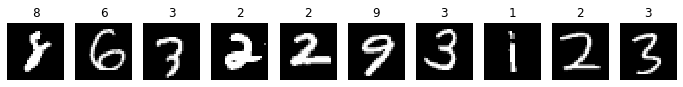

In [14]:
prng = np.random.RandomState(seed=123456789)  # seed to always re-draw the same distribution
plt_ind = prng.randint(low=0, high=train_set_size, size=10)

fig, axes = plt.subplots(1, 10, figsize=(12, 3))
for ax, im, lb in zip(axes, train_images[plt_ind], train_labels[plt_ind]):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(lb)

### 2.2 MLP
*Add your implementation and discussion*

In [15]:
import torch
from torch import optim, nn
import torch.nn.functional as F
from torchvision import transforms, datasets
import torch.utils.data as data

In [16]:
def get_dataloaders(batch_size = 16, 
                    valid_size = 0.2,
                    shuffle= True):
    """
    Helper function to create online dataloaders to use in pytorch network.
    """
    transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5), (0.5))])
    train_dataset = datasets.MNIST('MNIST_data/', download= True, train= True, transform = transform)
    
    test_dataset = datasets.MNIST('MNIST_data/', download= True, train= False, transform = transform)
    
    num_train = len(train_dataset)
    indicies = list(range(num_train))
    split = int(np.floor(valid_size * num_train))
    
    if shuffle:
        np.random.shuffle(indicies)
        
    train_ix, val_ix = indicies[split:], indicies[:split]
    train_sampler = data.SubsetRandomSampler(train_ix)
    val_sampler = data.SubsetRandomSampler(val_ix)
    
    train_loader = data.DataLoader(train_dataset, batch_size=batch_size, sampler= train_sampler)
    val_loader = data.DataLoader(train_dataset, batch_size=batch_size, sampler= val_sampler)
    test_loader = data.DataLoader(test_dataset, batch_size = batch_size)
    return train_loader, val_loader, test_loader

train_loader, val_loader, test_loader = get_dataloaders()




In [17]:
class Net(torch.nn.Module):
    def __init__(self):
        super(Net, self,).__init__()
        self.fc1 = nn.Linear(784, 100)
        self.fc2 = nn.Linear(100, 10)
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x
        
    def predict(self, x):
        logits = self.forward(x)
        return F.softmax(x)
    
net = Net()

In [18]:
def validate_on_dataloader(net, dataloader):
    """
    Returns accuracy on a given dataloader
    """
    net.eval()
    correct = 0
    total = 0
    with torch.no_grad():    
        for images, labels in val_loader:

            images.resize_(images.size()[0], 784)

            output = net(images)
            predicted = (F.softmax(output).data).max(1)[1]
            correct += (labels == predicted).sum().item()
            total += labels.size(0)

    return 100*(correct/total)

In [19]:
import time

epochs = 20
eval_every = 2
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr = 0.001)

for e in range(epochs):
    epoch_loss = 0
    accuracy = 0
    tic = time.time()
    net.train()
    
    print('--------------------------------------------------')
    print('Started training on epoch {}.'.format(e))

    
    for images, labels in train_loader:
        images.resize_(images.size()[0], 784)
        
        optimizer.zero_grad()
        
        output = net(images)
        loss = criterion(output, labels)
        loss.backward()
        
        optimizer.step()
        
        epoch_loss += loss.item()
    
    if e % eval_every == 0:
        accuracy = validate_on_dataloader(net, val_loader)
        print('Accuracy on validation set {}'.format(accuracy))


        
    toc = time.time()
    print('Finished epoch after {}s'.format(np.around(toc-tic, 3)))
    print('Loss after epoch {} was {}.'.format(e, epoch_loss))
    print('--------------------------------------------------\n')
    

--------------------------------------------------
Started training on epoch 0.
Accuracy on validation set 92.35
Finished epoch after 11.246s
Loss after epoch 0 was 1124.4774397518486.
--------------------------------------------------

--------------------------------------------------
Started training on epoch 1.
Finished epoch after 10.096s
Loss after epoch 1 was 596.3280532676727.
--------------------------------------------------

--------------------------------------------------
Started training on epoch 2.
Accuracy on validation set 94.66666666666667
Finished epoch after 11.647s
Loss after epoch 2 was 463.73455727798864.
--------------------------------------------------

--------------------------------------------------
Started training on epoch 3.
Finished epoch after 10.225s
Loss after epoch 3 was 395.5456504263566.
--------------------------------------------------

--------------------------------------------------
Started training on epoch 4.
Accuracy on validation set 9

In [20]:
test_accuracy = validate_on_dataloader(net, train_loader)

print('Accuracy on testset:', test_accuracy)

Accuracy on testset: 96.71666666666667


Label: 1
Predicted: 1


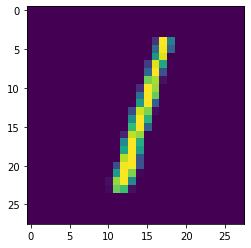

In [21]:
dataiter = iter(test_loader)
images, labels = dataiter.next()
img_nr = np.random.randint(5, size = 1)
img, label = images[img_nr], labels[img_nr]

plt.imshow(img.resize(28,28))
print('Label:', label.item())

output = net(img.resize(1, 784))
pred = (F.softmax(output).data).max(1)[1]
print('Predicted:', pred.item())

---
#### Thoughts on Task 2

As the group had more experience in PyTorch we chose to use this to implement the neural net, and it gave quite good performance.  
We see that the neural net is performing very good with quite low complexity, and if we were to add for example convolutional layers we would get even better performance.  
Compared to lab 2 where we had to pick out features and tune our algos, this is a lot easier and is probably performing a lot better than we could manage by doing this manually.

---